# Problem Set #7

### MACS 30150, Dr. Evans
### Ruixi Li

In [1]:
import warnings
warnings.filterwarnings("ignore")

## 1.Multinomial logistic regression and cross validation

##### (a)

In [2]:
import pandas as pd

df = pd.read_csv('data/strongdrink.txt')
df.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df["cultivar"].value_counts()

2    71
1    59
3    46
Name: cultivar, dtype: int64

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df[['alco', 'malic', 'tot_phen', 'color_int']]
y = df['cultivar']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=20)
result = LogisticRegression(solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)
print('j = 1:')
print('Intercept =', result.intercept_[0])
print('Coefficients =', result.coef_[0])
print('j = 2:')
print('Intercept =', result.intercept_[1])
print('Coefficients =', result.coef_[1])

j = 1:
Intercept = -24.027612332384205
Coefficients = [ 1.70173372 -0.26578706  1.22410088  0.02250769]
j = 2:
Intercept = 22.780728453347873
Coefficients = [-1.46629723 -0.33295031  0.6635562  -0.92268173]


In [5]:
y_pred = result.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      1.00      0.93        13
           2       1.00      0.90      0.95        21
           3       1.00      1.00      1.00        10

   micro avg       0.95      0.95      0.95        44
   macro avg       0.96      0.97      0.96        44
weighted avg       0.96      0.95      0.96        44



From the classification report, the error rate for j = 1 is 13%, for j = 2 is 0%, for j = 3 is 0%. According to the f1-score, j = 3 is best at prediction and more accurate than j = 2 which is the one with most observations.

In [6]:
MSE = (y_test != y_pred).mean()
print('The MSE from the test set is ', MSE)

The MSE from the test set is  0.045454545454545456


## (b)

In [7]:
import numpy as np
from sklearn.model_selection import LeaveOneOut

X = df[['alco', 'malic', 'tot_phen', 'color_int']].values
y = df['cultivar'].values

N_loo = X.shape[0]
loo = LeaveOneOut()
loo.get_n_splits(X)

MSE_vec = np.zeros(N_loo)
y_test_lst = np.zeros(N_loo)
y_pred_lst = np.zeros(N_loo)

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    LogReg = LogisticRegression()
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    y_pred_lst[test_index] = y_pred
    y_test_lst[test_index] = y_test
    MSE_vec[test_index] = (y_test != y_pred)
MSE_LOO = MSE_vec.mean()
print(classification_report(y_test_lst, y_pred_lst))
print('The LOOCV estimate for the test MSE is', MSE_LOO)

              precision    recall  f1-score   support

         1.0       0.84      0.78      0.81        59
         2.0       0.83      0.89      0.86        71
         3.0       0.96      0.93      0.95        46

   micro avg       0.86      0.86      0.86       176
   macro avg       0.87      0.87      0.87       176
weighted avg       0.86      0.86      0.86       176

The LOOCV estimate for the test MSE is 0.13636363636363635


From the classification report, the error rate for j = 1 is 16%, for j = 2 is 17%, for j = 3 is 4%.

Compared with the method of (a), the LOOCV's error rate is higher.

## (c)

In [8]:
from sklearn.model_selection import KFold

k = 4
kf = KFold(k, random_state=10, shuffle=True)
kf.get_n_splits(X)
MSE_vec = np.zeros(k)
y_test_lst = np.zeros(X.shape[0])
y_pred_lst = np.zeros(X.shape[0])
k_ind = int(0)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    LogReg = LogisticRegression()
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    y_test_lst[test_index] = y_test
    y_pred_lst[test_index] = y_pred
    MSE_vec[k_ind] = (y_test != y_pred).mean()
    k_ind += 1
MSE_KF = MSE_vec.mean()
print(classification_report(y_test_lst, y_pred_lst))
print('The k-fold estimate for the test MSE is', MSE_KF)

              precision    recall  f1-score   support

         1.0       0.78      0.73      0.75        59
         2.0       0.79      0.85      0.82        71
         3.0       0.96      0.93      0.95        46

   micro avg       0.83      0.83      0.83       176
   macro avg       0.84      0.84      0.84       176
weighted avg       0.83      0.83      0.83       176

The k-fold estimate for the test MSE is 0.17045454545454544


From the classification report, the error rate for j = 1 is 22%, for j = 2 is 21%, for j = 3 is 4%.

Compared with the method of (a) and (b), the k-fold estimate's error rate is higher.

## 2

## (a)

In [9]:
df = pd.read_csv('data/CoolIndex.txt', header=None, names=['Age', 'CoolIndex'])
df.head()

,Age,CoolIndex
0,11.0,10.981602
1,11.0,11.364925
2,11.0,10.190227
3,11.0,9.903725
4,11.0,8.997918


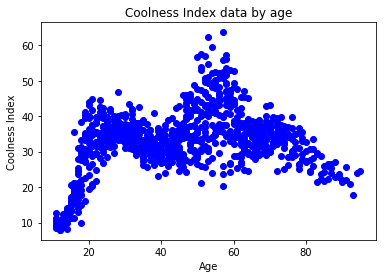

In [20]:
import matplotlib
import matplotlib.pyplot as plt

plt.scatter(df['Age'], df['CoolIndex'], color='b')
plt.xlabel('Age')
plt.ylabel('Coolness Index')
plt.title('Coolness Index data by age')
plt.show()

## (b)

In [11]:
import statsmodels.api as sm

df["bin1"] = np.where((df.Age >= 11) & (df.Age < 22), 1, 0)
df["bin2"] = np.where((df.Age >= 22) & (df.Age < 40), 1, 0)
df["bin3"] = np.where((df.Age >= 40) & (df.Age < 59), 1, 0)
df["bin4"] = np.where((df.Age >= 59) & (df.Age < 77), 1, 0)
df["bin5"] = np.where((df.Age >= 77) & (df.Age <= 95), 1, 0)

X = df[["bin1", "bin2", "bin3", "bin4", "bin5"]]
y = df['CoolIndex']
res = sm.OLS(y,X).fit()
coef = np.array(res.params.values)
print('The estimated step function values for bin1 is', coef[0])
print('The estimated step function values for bin2 is', coef[1])
print('The estimated step function values for bin3 is', coef[2])
print('The estimated step function values for bin4 is', coef[3])
print('The estimated step function values for bin5 is', coef[4])

The estimated step function values for bin1 is 20.102457252090748
The estimated step function values for bin2 is 34.47578807755938
The estimated step function values for bin3 is 37.63510549244961
The estimated step function values for bin4 is 35.22540004024275
The estimated step function values for bin5 is 27.296378244321282


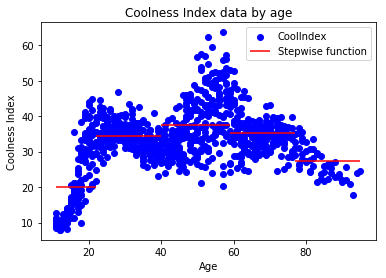

In [12]:
plt.scatter(df['Age'], df['CoolIndex'], color='b')
lower_age = np.array([11, 22, 40, 59, 77])
upper_age = np.array([22, 40, 59, 77, 95])
plt.hlines(coef, lower_age, upper_age, color='r', label='Stepwise function')
plt.xlabel('Age')
plt.ylabel('Coolness Index')
plt.legend(loc='upper right')
plt.title('Coolness Index data by age')
plt.show()

In [13]:
print('The predicted coolness of a 73-year old from the stepwise function is', res.predict([0,0,0,1,0])[0])

The predicted coolness of a 73-year old from the stepwise function is 35.22540004024275


## (c)

In [14]:
from scipy.interpolate import LSQUnivariateSpline

t = np.array([22, 40, 59, 77])
df.sort_index(0, ascending=True, inplace=True)
grouped_age = df.groupby('Age', as_index = False).mean()
result_ls = LSQUnivariateSpline(grouped_age['Age'].values, grouped_age['CoolIndex'].values, t, k=1)
age_vec = np.linspace(11, 95, 1000)

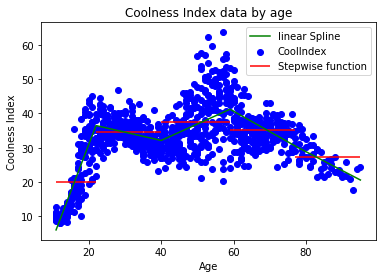

In [15]:
plt.scatter(df['Age'], df['CoolIndex'], color='b')
plt.hlines(coef, lower_age, upper_age, color='r', label='Stepwise function')
plt.plot(age_vec, result_ls(age_vec), color='g', label='linear Spline')
plt.xlabel('Age')
plt.ylabel('Coolness Index')
plt.legend(loc='upper right')
plt.title('Coolness Index data by age')
plt.show()

In [16]:
print('The predicted coolness index of a 73-year-old person from the linear spline is', result_ls(73))

The predicted coolness index of a 73-year-old person from the linear spline is 32.86784862349653


## (d)

In [17]:
result_cs = LSQUnivariateSpline(grouped_age['Age'].values, grouped_age['CoolIndex'].values, t, k=3)

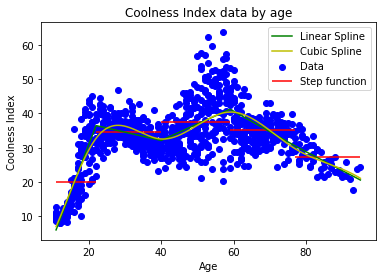

In [18]:
plt.scatter(df['Age'], df['CoolIndex'], color='b', label='Data')
plt.hlines(coef, lower_age, upper_age, color='r', label='Step function')
plt.plot(age_vec, result_ls(age_vec), color='g', label='Linear Spline')
plt.plot(age_vec, result_cs(age_vec), color='y', label='Cubic Spline')
plt.xlabel('Age')
plt.ylabel('Coolness Index')
plt.legend(loc='upper right')
plt.title('Coolness Index data by age')
plt.show()

In [19]:
print('The predicted coolness index of a 73-year-old person from the cubic spline is', result_cs(73))

The predicted coolness index of a 73-year-old person from the cubic spline is 32.642301066279764
